# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.311014e+01     1.655456e+01
 * time: 0.004747152328491211
     1     5.994410e+01     8.184993e+00
 * time: 0.014658212661743164
     2     5.481668e+01     1.061698e+01
 * time: 0.03684711456298828
     3     3.850629e+01     7.953356e+00
 * time: 0.06735110282897949
     4     2.927310e+01     7.601067e+00
 * time: 0.09914302825927734
     5     2.447022e+01     6.371014e+00
 * time: 0.13234400749206543
     6     1.155707e+01     1.786186e+00
 * time: 0.15783405303955078
     7     9.974074e+00     4.817940e+00
 * time: 0.26387619972229004
     8     9.046817e+00     2.311032e+00
 * time: 0.2857210636138916
     9     8.863976e+00     4.318177e+00
 * time: 0.3031580448150635
    10     8.106325e+00     2.693896e+00
 * time: 0.3245670795440674
    11     7.608327e+00     2.142535e+00
 * time: 0.34648704528808594
    12     7.013904e+00     2.128845e+00
 * time: 0.3661220073699951
    13     6.549771e+00     2.611832e+00
 * time: 0

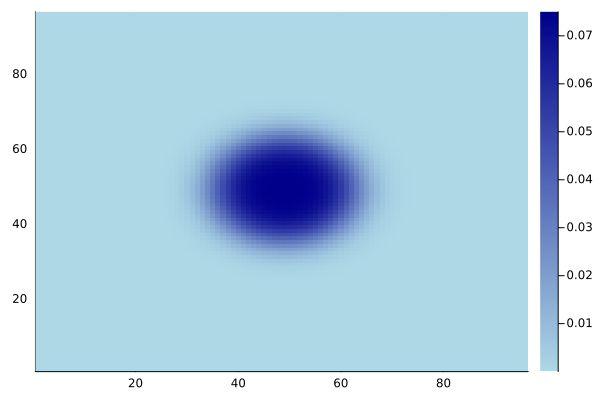

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)